# Pseudo GT for SDSSD 1
- Detection BBox 크기와 같은 annotation 생성 test

In [1]:
from torchvision.transforms import functional as TF
from torch.nn.functional import interpolate
import torch

import os
import json
import pickle
from PIL import Image

In [2]:
data_dir = '/content/drive/MyDrive/2021.summer_URP/PD/KAIST_PD'
ann_dir = '/content/drive/MyDrive/2021.summer_URP/PD/KAIST_PD_SEG'

In [3]:
img_ids_txt = 'train-all-20.txt'
with open(os.path.join(data_dir, img_ids_txt), 'r') as f:
    img_ids = f.readlines()
img_ids = list(map(lambda x: x[:-1], img_ids))

ann_paths = list(map(
    lambda img_id: os.path.join('annotation_json', img_id+'.json'),
    img_ids
))
img_dir_names = list(map(
    lambda img_id: os.path.split(img_id),
    img_ids
))
color_img_paths = list(map(
    lambda img_dir_name: os.path.join(
        'images', img_dir_name[0], 'visible', img_dir_name[1]+'.jpg'), 
    img_dir_names 
))
thermal_img_paths = list(map(
    lambda img_dir_name: os.path.join(
        'images', img_dir_name[0], 'lwir', img_dir_name[1]+'.jpg'), 
    img_dir_names
))

In [4]:
gt_save_dir = os.path.split(ann_dir)[0]
gt_save_path = os.path.join(gt_save_dir, 'TRAIN_GT.pkl')

# ====== annotation list 생성 (처음에만 호출) ====== #
# anns = []
# for i, ann_path in tqdm(enumerate(ann_paths)):
#     with open(os.path.join(data_dir, ann_path), 'r') as j:
#         anns_in_img = json.load(j)
#     anns.append(anns_in_img['annotation'])

# with open(gt_save_path, 'wb') as pkl:
#     pickle.dump(anns, pkl)
# ============================================= #

with open(gt_save_path, 'rb') as pkl:
    anns = pickle.load(pkl)

------

### TEST


In [5]:
i = 3000

In [6]:
img_path = os.path.join(data_dir, color_img_paths[i])
anns_in_img = anns[i]

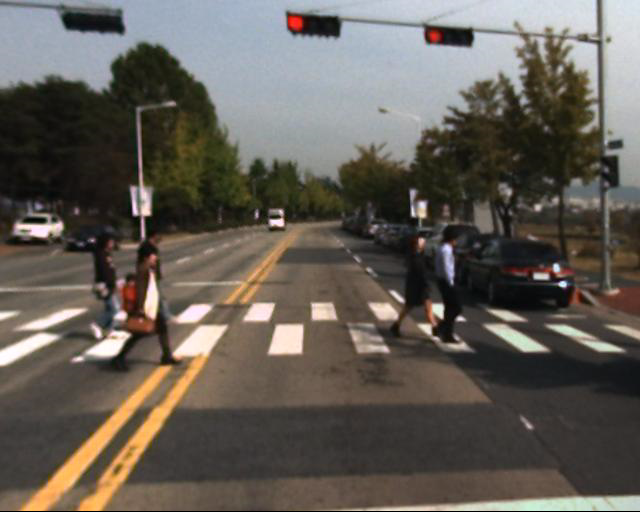

In [7]:
image = Image.open(img_path)
image

In [8]:
size = (image.height, image.width)
size

(512, 640)

In [9]:
pseudo_gt = torch.zeros(size)
pseudo_gt.size()

torch.Size([512, 640])

In [10]:
for ann in anns_in_img:
    x_min, y_min, x_max, y_max = ann['bbox']
    pseudo_gt[y_min:y_max+1, x_min:x_max+1] = 1

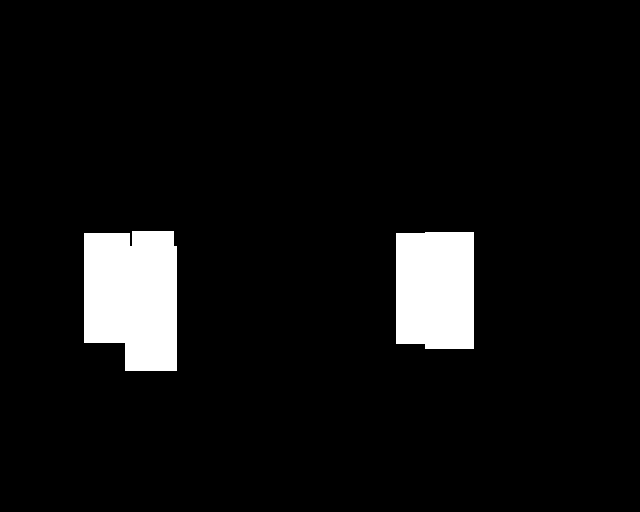

In [11]:
TF.to_pil_image(pseudo_gt)

In [ ]:
down_size = (38, 38)
down_gt = interpolate(pseudo_gt.unsqueeze(0).unsqueeze(0), size=down_size)

In [ ]:
down_gt.size()

torch.Size([1, 1, 38, 38])

In [ ]:
torch.sum((down_gt[0][0] > 0) & (down_gt[0][0] < 1))

tensor(0)

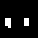

In [ ]:
TF.to_pil_image(down_gt[0, 0])

In [ ]:
down_size = (19, 19)
down_gt = interpolate(pseudo_gt.unsqueeze(0).unsqueeze(0), size=down_size)
down_gt.size()
TF.to_pil_image(down_gt[0, 0])

In [ ]:
down_size = (10, 10)
down_gt = interpolate(pseudo_gt.unsqueeze(0).unsqueeze(0), size=down_size)
down_gt.size()
TF.to_pil_image(down_gt[0, 0])

In [ ]:
down_size = (5, 5)
down_gt = interpolate(pseudo_gt.unsqueeze(0).unsqueeze(0), size=down_size)
down_gt.size()
TF.to_pil_image(down_gt[0, 0])

In [ ]:
down_size = (3, 3)
down_gt = interpolate(pseudo_gt.unsqueeze(0).unsqueeze(0), size=down_size)
down_gt.size()
TF.to_pil_image(down_gt[0, 0])

In [ ]:
down_size = (1, 1)
down_gt = interpolate(pseudo_gt.unsqueeze(0).unsqueeze(0), size=down_size)
down_gt.size()
TF.to_pil_image(down_gt[0, 0])

---

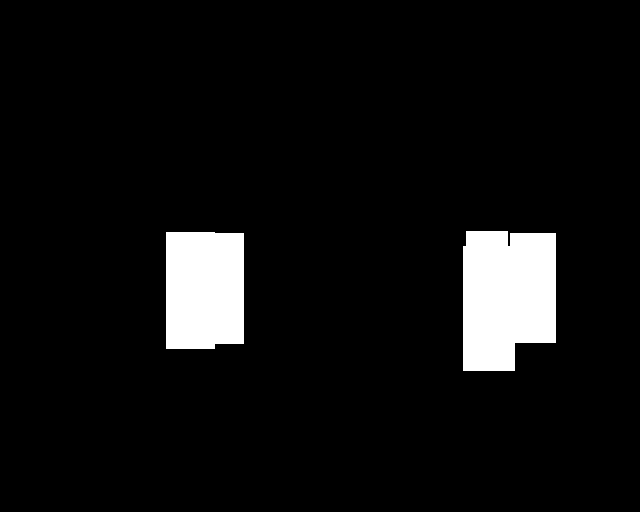

In [18]:
flip_seg_gt = pseudo_gt.unsqueeze(0)
flip_seg_gt = torch.flip(flip_seg_gt, dims=(0, 2))
TF.to_pil_image(flip_seg_gt)

In [21]:
flip_seg_gt.squeeze(0).size()

torch.Size([512, 640])